## Breast Cancer Survival Prediction

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [121]:
df = pd.read_csv('breast_cancer_survival.csv')

In [122]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

In [124]:
df = df.dropna()

In [125]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,317.000000,317.000000,317.000000,317.000000,317.000000
mean,58.725552,-0.027232,0.949557,-0.095104,0.006713
std,12.827374,0.543858,0.906153,0.589027,0.625965
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.350600,0.368840,-0.531360,-0.382240
50%,58.000000,0.005649,0.997130,-0.193040,0.038522
75%,67.000000,0.336260,1.612000,0.251210,0.436250
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [126]:
df['Gender'].unique()

array(['FEMALE', 'MALE'], dtype=object)

In [127]:
df['Gender'].value_counts()

Gender
FEMALE    313
MALE        4
Name: count, dtype: int64

In [128]:
df['Tumour_Stage'].unique()

array(['II', 'I', 'III'], dtype=object)

In [129]:
df['Tumour_Stage'].value_counts()

Tumour_Stage
II     180
III     77
I       60
Name: count, dtype: int64

Text(0.5, 1.0, 'Tumour Stage')

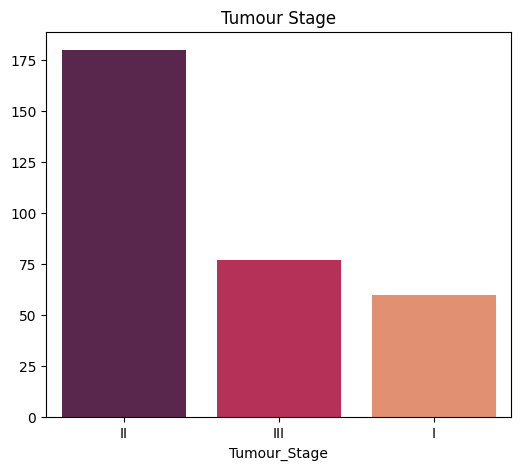

In [130]:

# Your data manipulation code remains the same
stage = df['Tumour_Stage'].value_counts()
transactions = stage.index
quantity = stage.values

plt.figure(figsize=(6,5))
sns.barplot(x=transactions, y=quantity, hue=transactions, palette='rocket', legend=False).set_title('Tumour Stage')


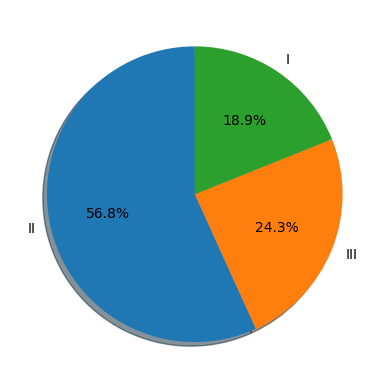

In [131]:
plt.pie(stage,labels=transactions,autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

In [132]:
df["Histology"].unique()

array(['Infiltrating Ductal Carcinoma', 'Infiltrating Lobular Carcinoma',
       'Mucinous Carcinoma'], dtype=object)

In [133]:
df["Histology"].value_counts()

Histology
Infiltrating Ductal Carcinoma     224
Infiltrating Lobular Carcinoma     81
Mucinous Carcinoma                 12
Name: count, dtype: int64

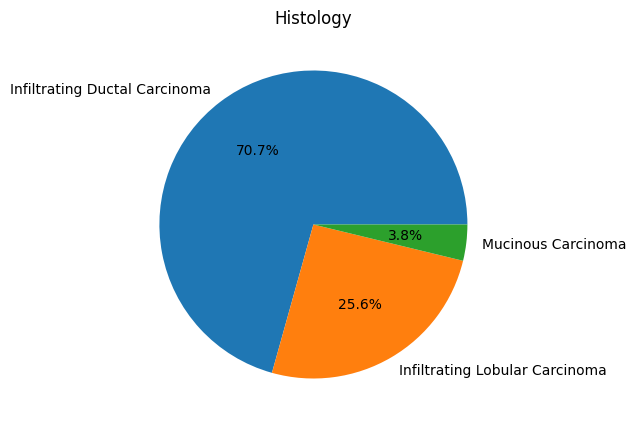

In [134]:
stage = df["Histology"].value_counts()
transactions = df["Histology"].value_counts().index
quantity = df["Histology"].value_counts().values

plt.figure(figsize=(6,5))
plt.title("Histology")
plt.pie(stage,labels=transactions,autopct='%1.1f%%')
plt.show()

In [135]:
df["ER status"].value_counts()

ER status
Positive    317
Name: count, dtype: int64

In [136]:
df["PR status"].value_counts()

PR status
Positive    317
Name: count, dtype: int64

In [137]:
df['HER2 status'].value_counts()

HER2 status
Negative    288
Positive     29
Name: count, dtype: int64

### Now let’s have a look at the type of surgeries done to the patients:

In [138]:
df["Surgery_type"].value_counts()

Surgery_type
Other                          97
Modified Radical Mastectomy    89
Lumpectomy                     66
Simple Mastectomy              65
Name: count, dtype: int64

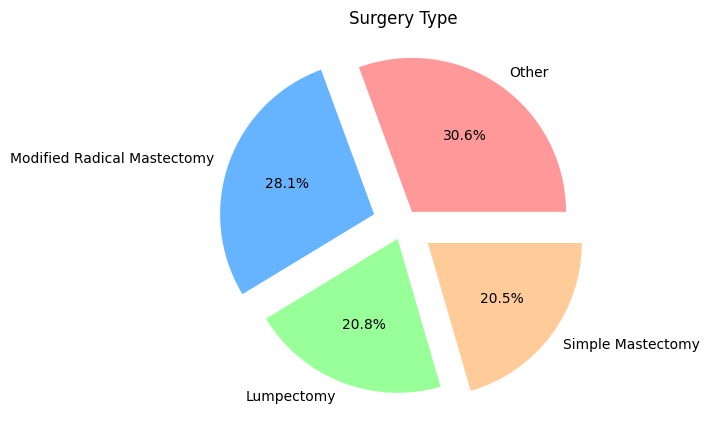

In [139]:
surgery =  df["Surgery_type"].value_counts()
transactions = df["Surgery_type"].value_counts().index
quantity = df["Surgery_type"].value_counts().values

plt.figure(figsize=(6,5))
explode = (0.1,0.2,0.1,0.2)
plt.title("Surgery Type")
plt.pie(surgery,labels=transactions,autopct='%1.1f%%',colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],explode=explode)
plt.show()


## Encoding

In [140]:
from  sklearn.preprocessing import LabelEncoder

In [141]:
encoder = LabelEncoder()
columns = ['Gender','Tumour_Stage','Histology','ER status','PR status','HER2 status','Surgery_type']
for i in columns:
    df[i] = encoder.fit_transform(df[i])


In [142]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,0,0.95256,2.15000,0.007972,-0.048340,1,0,0,0,0,2,20-May-18,26-Aug-18,Alive
1,54,0,0.00000,1.38020,-0.498030,-0.507320,1,0,0,0,0,2,26-Apr-18,25-Jan-19,Dead
2,63,0,-0.52303,1.76400,-0.370190,0.010815,1,0,0,0,0,0,24-Aug-18,08-Apr-20,Alive
3,78,0,-0.87618,0.12943,-0.370380,0.132190,0,0,0,0,0,2,16-Nov-18,28-Jul-20,Alive
4,42,0,0.22611,1.74910,-0.543970,-0.390210,1,0,0,0,1,0,12-Dec-18,05-Jan-19,Alive


In [143]:
df = df.drop(columns=['ER status','PR status'])

In [144]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,0,0.95256,2.15000,0.007972,-0.048340,1,0,0,2,20-May-18,26-Aug-18,Alive
1,54,0,0.00000,1.38020,-0.498030,-0.507320,1,0,0,2,26-Apr-18,25-Jan-19,Dead
2,63,0,-0.52303,1.76400,-0.370190,0.010815,1,0,0,0,24-Aug-18,08-Apr-20,Alive
3,78,0,-0.87618,0.12943,-0.370380,0.132190,0,0,0,2,16-Nov-18,28-Jul-20,Alive
4,42,0,0.22611,1.74910,-0.543970,-0.390210,1,0,1,0,12-Dec-18,05-Jan-19,Alive


In [147]:
df = df.drop(columns=['Patient_Status','Date_of_Surgery','Date_of_Last_Visit'])

In [148]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type
0,42,0,0.95256,2.15000,0.007972,-0.048340,1,0,0,2
1,54,0,0.00000,1.38020,-0.498030,-0.507320,1,0,0,2
2,63,0,-0.52303,1.76400,-0.370190,0.010815,1,0,0,0
3,78,0,-0.87618,0.12943,-0.370380,0.132190,0,0,0,2
4,42,0,0.22611,1.74910,-0.543970,-0.390210,1,0,1,0


In [149]:
df.corr()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type
Age,1.000000,0.026696,-0.044541,-0.011387,-0.047362,0.095417,-0.144483,-0.107611,-0.068386,-0.034617
Gender,0.026696,1.000000,0.159685,0.000406,-0.017109,-0.014185,0.033881,0.034995,-0.035872,0.026380
Protein1,-0.044541,0.159685,1.000000,0.223093,-0.103046,0.259171,-0.051447,0.066462,-0.033544,-0.127882
Protein2,-0.011387,0.000406,0.223093,1.000000,-0.407670,0.084939,-0.049881,0.013074,-0.013568,-0.045292
Protein3,-0.047362,-0.017109,-0.103046,-0.407670,1.000000,0.076759,0.019770,-0.022359,-0.017628,-0.059958
Protein4,0.095417,-0.014185,0.259171,0.084939,0.076759,1.000000,-0.050364,0.016289,0.004728,-0.113382
Tumour_Stage,-0.144483,0.033881,-0.051447,-0.049881,0.019770,-0.050364,1.000000,-0.014403,0.141031,0.010979
Histology,-0.107611,0.034995,0.066462,0.013074,-0.022359,0.016289,-0.014403,1.000000,-0.012156,-0.052023
HER2 status,-0.068386,-0.035872,-0.033544,-0.013568,-0.017628,0.004728,0.141031,-0.012156,1.000000,-0.092058
Surgery_type,-0.034617,0.026380,-0.127882,-0.045292,-0.059958,-0.113382,0.010979,-0.052023,-0.092058,1.000000


<Axes: >

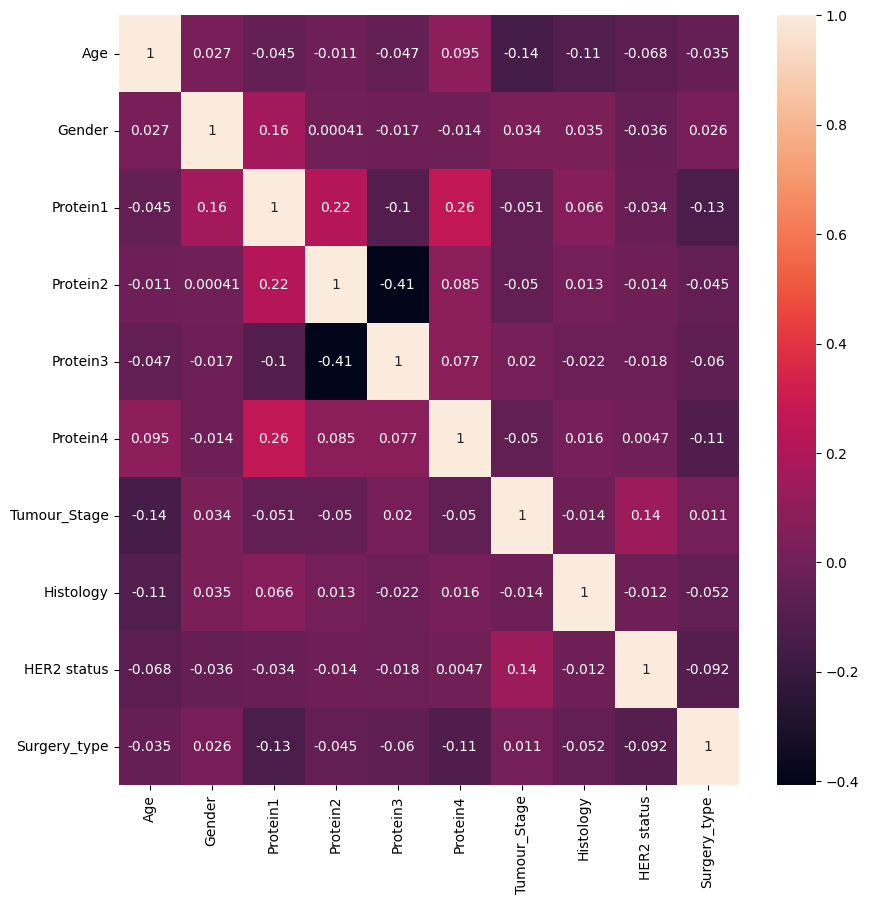

In [153]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

## Predictions

In [198]:
X = df
df2 = pd.read_csv('breast_cancer_survival.csv')
df2.dropna(inplace=True)
y = encoder.fit_transform(df2['Patient_Status'])


In [168]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=42)

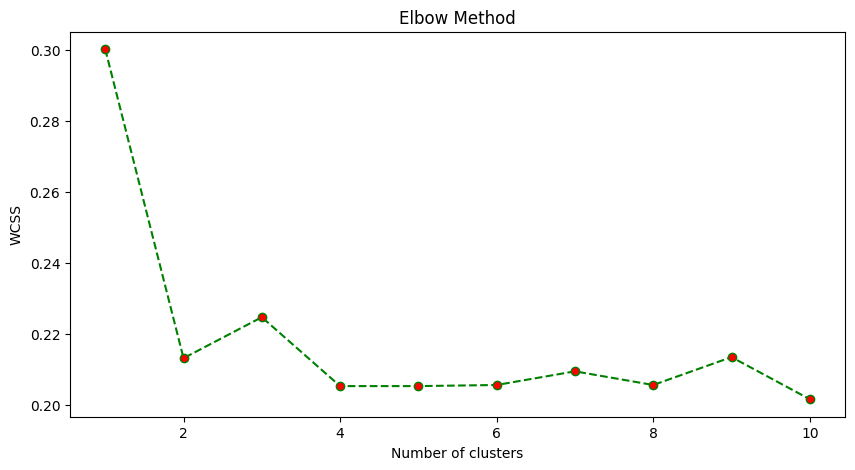

In [182]:
## Elbow Method KNN
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
error_rate = []
for i in range(1,11):
    knn = KNN(n_neighbors=i)
    score = cross_val_score(knn, X_train, y_train, cv=10)
    error_rate.append(1-score.mean())
    

plt.figure(figsize=(10,5))
plt.plot(range(1,11),error_rate,marker='o',linestyle='--',color='g',markerfacecolor='r')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [170]:
#checking for various algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [187]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
clf4 = SVC()
clf5 = GaussianNB()
clf6 = KNN(n_neighbors=4)

In [188]:
models = [clf1,clf2,clf3,clf4,clf5,clf6]
accuracy = {}
for i in models:
    i.fit(X_train,y_train)
    accuracy[i] = i.score(X_test,y_test)

In [189]:
accuracy

{LogisticRegression(): 0.796875,
 DecisionTreeClassifier(): 0.640625,
 RandomForestClassifier(): 0.796875,
 SVC(): 0.796875,
 GaussianNB(): 0.765625,
 KNeighborsClassifier(n_neighbors=4): 0.765625}

In [216]:
features = np.array([[42.0, 0.95, 0.0, 1.32638, -0.498415, -0.543680, 3, 0, 0, 2]])
if clf1.predict(features) == 1:
    print("Patient is Dead")
else:
    print("Patient is Alive")


Patient is Alive
